In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')
#Override settings that this image isn't set up for
mpl.rcParams['font.family'] = "sans-serif"

#other computational libraries
import numpy as np
import pandas as pd
import scipy
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle
import pulseAnalysis as pa


#read the pkl file from pulses
fileObj = open('pulses.pkl', 'rb')
exampleObj = pickle.load(fileObj)
fileObj.close()

print(exampleObj)

                                                                    Z1  \
                                                                    QI   
72208301829 550152   [65532, 65532, 65532, 65532, 65532, 65532, 655...   
            610538   [65532, 65532, 65532, 65532, 65532, 65532, 655...   
            620687   [65532, 65532, 65532, 65532, 65532, 65532, 655...   
72208302118 70193    [65532, 65532, 65532, 65532, 65532, 65532, 655...   
            340676   [65532, 65532, 65532, 65532, 65532, 65532, 655...   
...                                                                ...   
72210270959 2221381  [65532, 65532, 65532, 65532, 65532, 65532, 655...   
            2620954  [65532, 65532, 65532, 65532, 65532, 65532, 655...   
            2710001  [65532, 65532, 65532, 65532, 65532, 65532, 655...   
            3170542  [65532, 65532, 65532, 65532, 65532, 65532, 655...   
            3440767  [65532, 65532, 65532, 65532, 65532, 65532, 655...   

                                     

   SeriesNumber  EventNumber
0   72209162200       490759
1   72209162200       590105
2   72209162200       970769
3   72209162200       990193
4   72209162200      1200805
5   72209162200      1920692
6   72209162200      2640676
7   72209162200      3320285
8   72209162200      3470461
9   72209162200      5310198
[72208301829 72208302118 72208311151 72209162200 72209171225 72209172155
 72210191832 72210192240 72210200954 72210251956 72210261049 72210262224
 72210270959]
[550152 610538 620687]
[  70193  340676  530225  580726  920658 1220460 2520826 2560339 2690376
 3360712 3400635 3950868 4010638 4240150 5020188 6020421 6110497 6280605]
[1320198 1630263 1950136 2970369 3650606 3670094]
[ 490759  590105  970769  990193 1200805 1920692 2640676 3320285 3470461
 5310198]
[1500320 1970453 2280315 2920809 3240861 4530720 4950597 5080366]
[1220647 1520104]
[ 500590  680460 1000312 1000698 1430424 1560356 1640702 1690511 1931161]
[ 300587 1451328 1580294 1840013 2331140 2840178 3130642 319

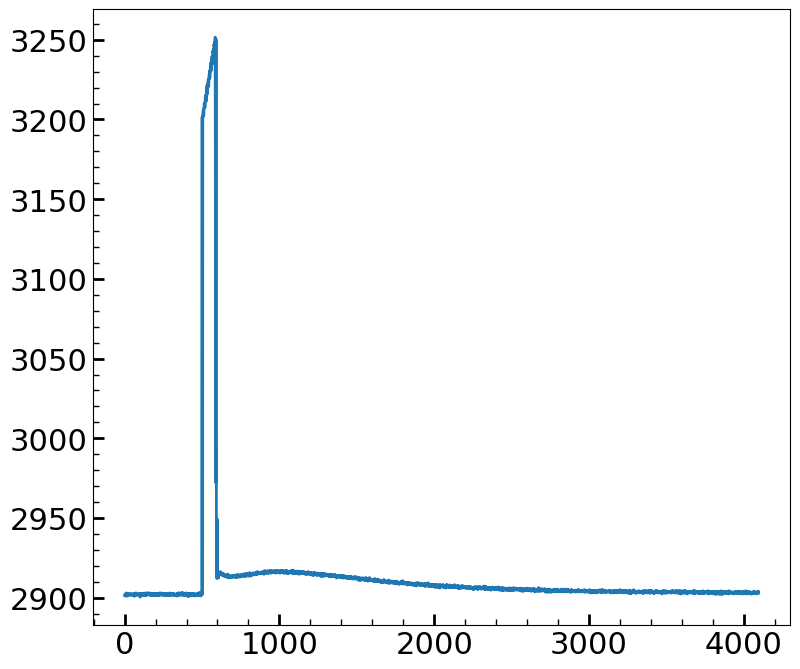

In [2]:
#coincident data
coindata1 = pd.read_csv("../coin_analysis/data/r76_roi_events_trig_set1.txt", skiprows=3, engine='python',skipfooter=1,sep="*",skipinitialspace=True, \
            index_col=False, \
            names=['garbage','Row','SeriesNumber','EventNumber','pt_keVee','coinwin','PTOFdelay','zip4.PAWKmax','zip4.PAWKr50','cchisq'], \
            delim_whitespace=False)
coindata2 = pd.read_csv("../coin_analysis/data/r76_roi_events_trig_set2.txt", skiprows=3, engine='python',skipfooter=1,sep="*",skipinitialspace=True, \
            index_col=False, \
            names=['garbage','Row','SeriesNumber','EventNumber','pt_keVee','coinwin','PTOFdelay','zip4.PAWKmax','zip4.PAWKr50','cchisq'], \
            delim_whitespace=False)
coindata3 = pd.read_csv("../coin_analysis/data/r76_roi_events_trig_set3.txt", skiprows=3, engine='python',skipfooter=1,sep="*",skipinitialspace=True, \
            index_col=False, \
            names=['garbage','Row','SeriesNumber','EventNumber','pt_keVee','coinwin','PTOFdelay','zip4.PAWKmax','zip4.PAWKr50','cchisq'], \
            delim_whitespace=False)
coindata4 = pd.read_csv("../coin_analysis/data/r76_roi_events_trig_set4.txt", skiprows=3, engine='python',skipfooter=1,sep="*",skipinitialspace=True, \
            index_col=False, \
            names=['garbage','Row','SeriesNumber','EventNumber','pt_keVee','coinwin','PTOFdelay','zip4.PAWKmax','zip4.PAWKr50','cchisq'], \
            delim_whitespace=False)
frames = [coindata1, coindata2, coindata3, coindata4]

coindata = pd.concat(frames)

ser = np.asarray(coindata['SeriesNumber'])
ev = np.asarray(coindata['EventNumber'])

pulse_struct = pa.parseEventList('goodchi.txt')

count=0
for s in pulse_struct:
    ser=int(s.replace('_',''))
    for ev in pulse_struct[s]:
      
    
      if count>10:
        continue
      
      count+=1

fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes
#plot the logic signal pulse
ax1.plot((exampleObj['Z4']['PA'][ser,ev]/3)+2900-2650)
plt.show()

[0, 0]


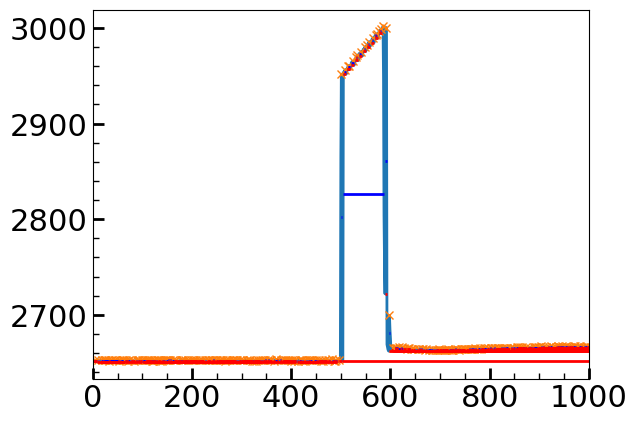

In [18]:
from scipy import signal
from scipy.signal import chirp, find_peaks, peak_widths


x = (exampleObj['Z4']['PA'][ser,ev]/3)
peaks, _ = find_peaks(x)
results_half = peak_widths(x, peaks, rel_height=0.5)
results_half[0]  # widths

results_full = peak_widths(x, peaks, rel_height=1)
results_full[0]  # widths

realPeaks=[0,0]
for i in peaks:
    if i<len(peaks):
        if peaks[i+1]-peaks[i]>100:
            realPeaks[0]=peaks[i]
        if peaks[i]-peaks[i+1]>100:
            realPeaks[1]=peaks[i]


print(realPeaks) #AAAAAAAAAAAAAAAAAAAAAAAAA fix later dum dum
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.hlines(*results_half[1:], color="b")
plt.hlines(*results_full[1:], color="r")
plt.xlim([0,1000])
plt.show()